## Importing Libraries

In [12]:
#Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

## Loading Dataset





*   age: age of primary beneficiary
*   sex: insurance contractor gender, female, male
*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   children: Number of children covered by health insurance / Number of dependents
*   smoker: Smoking
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   charges: Individual medical costs billed by health insurance


In [3]:
# Read data from "insurance.csv" file:
insurance= pd.read_csv("insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance.shape

(1338, 7)

## Some questions we are looking to learn:


1.   What kind of data we have, how should we treat different type of data?
2.   How can we deal with missing data?
3.   Are there any outliers?
4.   How can we add, remove, or modify the attributes so we cna properly maximize our insights?






In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
## Are there any missing values?

insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# Get a statistical summary of the numeric data

insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Explarotary Data Analysis / Data Visualization

In [9]:
#Examine the distribution of Bmi (Body Mass Index)
bmi = insurance["bmi"]
bmi.head()

0    27.900
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64

(array([  0.,   0.,   1.,  14.,  26.,  55.,  92., 129., 149., 165., 167.,
        160., 121.,  97.,  71.,  42.,  22.,  11.,  11.,   2.,   1.,   2.,
          0.,   0.,   0.]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60]),
 <a list of 25 Patch objects>)

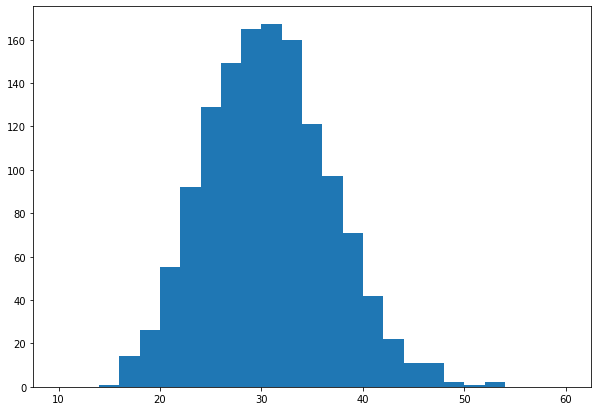

In [19]:
# Histogram distribution of bmi
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(bmi, bins = [10, 12, 14, 16 ,18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60])

In [10]:
#Examine the relationship between “smoker” and “charges”
insurance[["smoker","charges"]].head

<bound method NDFrame.head of      smoker      charges
0       yes  16884.92400
1        no   1725.55230
2        no   4449.46200
3        no  21984.47061
4        no   3866.85520
...     ...          ...
1333     no  10600.54830
1334     no   2205.98080
1335     no   1629.83350
1336     no   2007.94500
1337    yes  29141.36030

[1338 rows x 2 columns]>

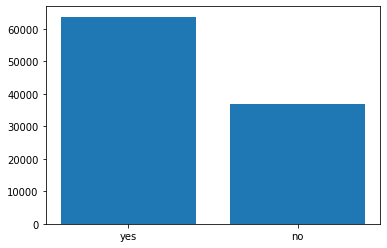

In [21]:
# We can create a bar chart with smoker on the x-axis and charges on the y-axis:
plt.bar(insurance["smoker"], insurance["charges"])
#display the chart
plt.show()

In [24]:
# Examine the relationship between “smoker” and “region”

#I want to use Seaborn library to visualize the relationship between two categorical variables
first_dimension = "smoker"
horizontal_label = "x label"
second_dimension = "region"

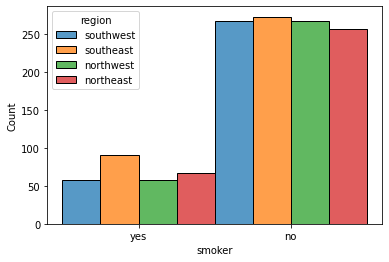

In [25]:
sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=insurance,
            stat="count",
            multiple="dodge")

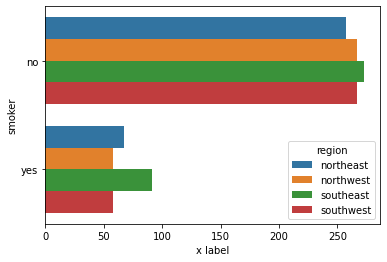

In [26]:
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=insurance.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

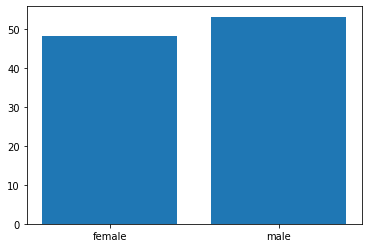

In [33]:
# Examine the relationship between “bmi” and “sex”:
# We can create a bar chart with sex on the x-axis and bmi on the y-axis:
plt.bar(insurance["sex"], insurance["bmi"])
#display the chart
plt.show()


In [60]:
# Find the "region" with the most "children"
first_dimension = "region"
horizontal_label = "x label"
second_dimension = "children"

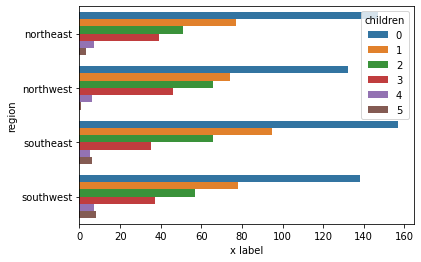

In [61]:
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=insurance.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())

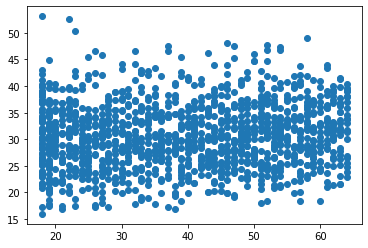

In [55]:
# Examine the relationship between “age” and “bmi”.
plt.scatter(insurance["age"], insurance["bmi"])
#display the chart
plt.show()

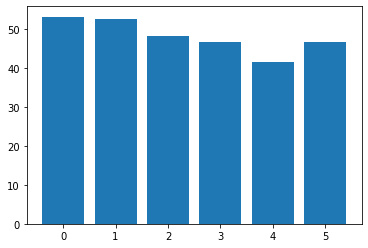

In [40]:
# Examine the relationship between “bmi” and “children”.
plt.bar(insurance["children"], insurance["bmi"])
#display the chart
plt.show()

In [42]:
# Finding outlier for  "bmi" variable

insurance.describe()["bmi"]
# Mean is about 30 and max value 53.13, it seems neab is sensitive to outliers. I want to see a visual plot to understand outlier data points.

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [43]:
#Importing plotly express for plotting a boxplot for variable of interest

import plotly.express as px


In [45]:
fig = px.box(insurance, y="bmi")
fig.show()

#We have couple of outliers as depicted in the graph below. Boxplot uses quartiles as boundaries, and here upper fence is at 46.75. Hence any value above 46.75 are deemed as outliers. 

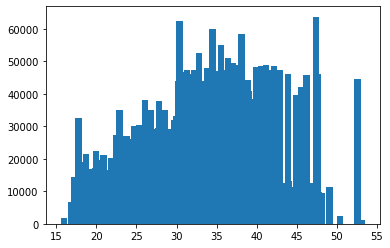

In [46]:
# Examine the relationship between “bmi” and “charges”.
plt.bar(insurance["bmi"], insurance["charges"])
#display the chart
plt.show()

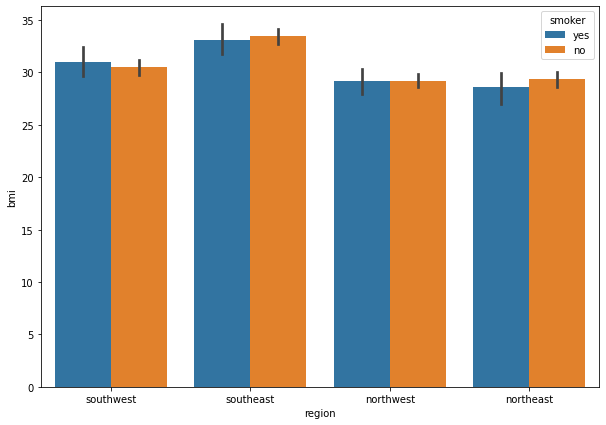

In [62]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
plt.figure(figsize=(10,7))
sns.barplot(x="region", y="bmi", hue="smoker", data= insurance)

## Preprocessing

### Dealing with Categorical Attributes

1. Label Encoding

In [63]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  insurance[column_name] = label_encoder.fit_transform(insurance[column_name])

In [65]:
label_encoding("smoker")
label_encoding("sex")

In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


###### 2. One-Hot Encoding

In [67]:
one_hot = pd.get_dummies(insurance["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [68]:
df= pd.concat([insurance, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Splitting Dataset

In [72]:
x = df.drop("charges", axis=1)
y = df["charges"]

## Feature Scaling

#### We have two types of feature scaling: Normalization and Standardization

In [73]:
scaler = MinMaxScaler()
x= scaler.fit_transform(x)
x[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [74]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state=42)

In [75]:
print(f"""
Shape of x train : {x_train.shape}
Shape of y train : {y_train.shape}
Shape of x test : {x_test.shape}
Shape of y test : {y_test.shape}
""")


Shape of x train : (1070, 9)
Shape of y train : (1070,)
Shape of x test : (268, 9)
Shape of y test : (268,)



### Model Selection

In [76]:
# ML Models:

linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

In [77]:
linreg_scores = cross_val_score(linreg, x_train, y_train, scoring = "neg_mean_squared_error", cv=10)

In [78]:
linreg_scores

array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
       -36545076.53517248, -34064321.21101744, -37545462.85261907,
       -53003844.65025207, -39666927.56171686, -38357145.09175086,
       -32042446.75311643])

In [79]:
DecTree_scores = cross_val_score(DecTree, x_train, y_train, scoring =  "neg_mean_squared_error", cv=10)

In [80]:
RandForest_scores = cross_val_score(RandForest, x_train, y_train, scoring =  "neg_mean_squared_error", cv=10)

In [81]:
SVM_scores = cross_val_score(SVM, x_train, y_train, scoring =  "neg_mean_squared_error", cv=10)

In [82]:
# Regression Evaluation Metrics:

def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE scores : {scores}
  Mean : {scores.mean()}
  Standard deviation : {scores.std()}
  """)

In [83]:
score_display(linreg_scores)


  RMSE scores : [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean : 6133.376271799343
  Standard deviation : 517.5318567882914
  


In [84]:
score_display(DecTree_scores)


  RMSE scores : [6479.1264372  6157.48969047 7359.75643408 7247.67338034 7354.37471854
 6066.49759391 7187.47771807 7206.27312253 6990.80043368 5743.2554955 ]
  Mean : 6779.272502431847
  Standard deviation : 577.8312438958368
  


In [85]:
score_display(RandForest_scores)


  RMSE scores : [4766.52584389 5154.83601033 3821.03090925 4494.99626443 5224.75575411
 4818.97725097 5581.71760635 5404.14659279 5114.18560604 4683.2039478 ]
  Mean : 4906.437578595634
  Standard deviation : 483.151561370904
  


In [86]:
score_display(SVM_scores)


  RMSE scores : [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean : 12541.318099949585
  Standard deviation : 951.4602172803403
  


####### Random Forest regressor has the lowest Root mean squared error (4766.52). We will select this.

#### Parameter Tuning

In [88]:
params = {"n_estimators": [3,10,20, 30, 45, 50],
          "n_jobs" : [2, 3, 4, 6, 8, 10]}

In [89]:
grid_s = GridSearchCV(RandForest, params, cv = 5, scoring = "neg_mean_squared_error")

In [90]:
grid_s.fit(x_train, y_train);

In [91]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 10}

In [92]:
# RMSE and the parameters 
for mean_score, params in zip((grid_s.cv_results_["mean_test_score"]),
                              (grid_s.cv_results_["params"])):
  print(np.sqrt(-mean_score), '     ',params);

5494.8338126361205       {'n_estimators': 3, 'n_jobs': 2}
5567.070874232258       {'n_estimators': 3, 'n_jobs': 3}
5586.73541058852       {'n_estimators': 3, 'n_jobs': 4}
5459.047494372723       {'n_estimators': 3, 'n_jobs': 6}
5666.247485710698       {'n_estimators': 3, 'n_jobs': 8}
5640.922811988199       {'n_estimators': 3, 'n_jobs': 10}
5188.8480192427405       {'n_estimators': 10, 'n_jobs': 2}
5105.337383594037       {'n_estimators': 10, 'n_jobs': 3}
5125.4054733780595       {'n_estimators': 10, 'n_jobs': 4}
5202.297690192146       {'n_estimators': 10, 'n_jobs': 6}
5111.028830391276       {'n_estimators': 10, 'n_jobs': 8}
5111.225833020077       {'n_estimators': 10, 'n_jobs': 10}
5024.954396564564       {'n_estimators': 20, 'n_jobs': 2}
5024.724061367228       {'n_estimators': 20, 'n_jobs': 3}
5018.247613577016       {'n_estimators': 20, 'n_jobs': 4}
5026.978065369403       {'n_estimators': 20, 'n_jobs': 6}
5025.627113838959       {'n_estimators': 20, 'n_jobs': 8}
4935.14319610829

### Predicting

In [93]:
predictions = grid_s.best_estimator_.predict(x_test)

In [94]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [95]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                           "Predictions" : predictions[0:10]})
comparison

,Y Test,Predictions
0,9095.06825,10300.554335
1,5272.17580,4873.798284
2,29330.98315,28437.717593
3,9301.89355,12457.260875
4,33750.29180,34917.978499
5,4536.25900,8833.852156
6,2117.33885,2061.660946
7,14210.53595,14817.654624
8,3732.62510,5087.671095
9,10264.44210,10634.902793


### Model Evaluation

In [97]:
def regression_evaluation(predicts):
  mse = mean_squared_error(y_test, predicts)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, predicts)
  mae = mean_absolute_error(y_test, predicts)


  print(f"Mean Absolute Error : {mae} \nMean Squared Error: {mse}  \nRoot Mean Squared Error : {rmse}  \nR squared score: {r_squared}")

In [98]:
regression_evaluation(predictions)

Mean Absolute Error : 2552.102622367101 
Mean Squared Error: 21644236.801037192  
Root Mean Squared Error : 4652.33670331772  
R squared score: 0.8605834869434401
